# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


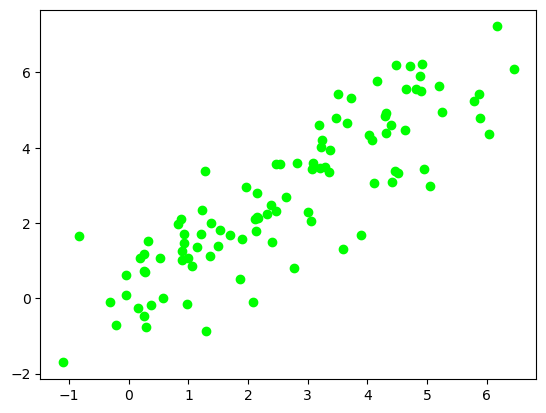

In [22]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

x = np.linspace(0,5,100) + random.randn(100) #100 bodu od 0 do 5


plt.scatter(x, x + random.randn(len(x)), color = "lime")


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19764\3910686178.py:4: RuntimeWarning: invalid value encountered in true_divide
  Z = np.sin(np.sqrt(X**2 + Y**2))/np.sqrt(X**2 + Y**2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19764\3910686178.py:8: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  p = plt.contour(X, Y, Z, rstride=4, cstride=4, linewidth=0)


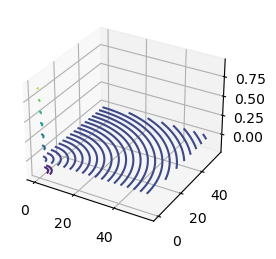

In [107]:
x = np.linspace(0, 55, 100)
y = np.linspace(0, 55, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))/np.sqrt(X**2 + Y**2)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = plt.contour(X, Y, Z, rstride=4, cstride=4, linewidth=0)


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


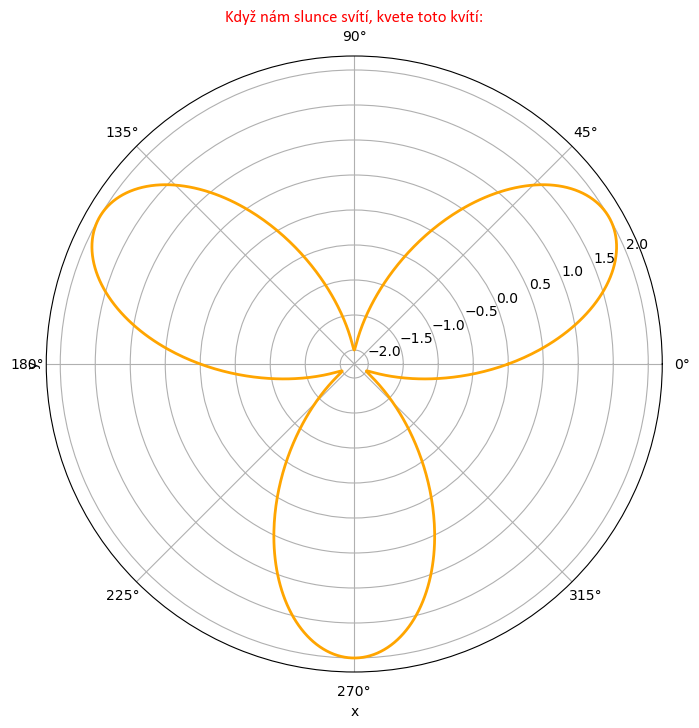

In [81]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
theta = np.linspace(0, 2*np.pi, 1000)
t = 2 * np.sin(3*theta)
ax.plot(theta, t, color='Orange', lw=2)       #lw - tloustka krivky
ax.set_xlabel('x')                            # Nastavení popisku osy x
ax.set_ylabel('y')                            # Nastavení popisku osy y
title_text = ax.set_title('Když nám slunce svítí, kvete toto kvítí:')
title_text.set_color('Red') 
title_text.set_fontname('Calibri')


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


Text(0, 0.5, 'osa y')

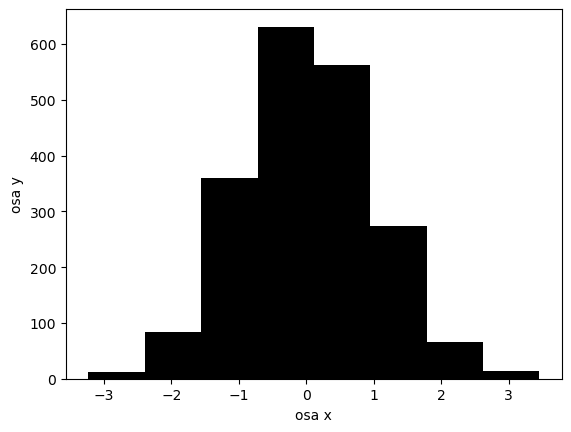

In [9]:

n = np.random.randn(2000)        # Spousta náhodných čísel (norm.rozdělení)
plt.hist(n, 8, color = "black")  # Histogram o 8 "binech"
plt.xlabel('osa x')              # Nastavení popisku osy x
plt.ylabel('osa y')              # Nastavení popisku osy y


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


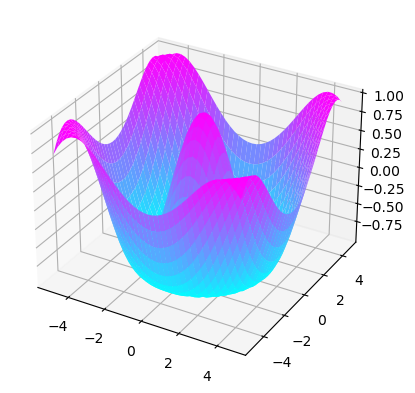

In [123]:
X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
Z = np.cos(np.sqrt((X**2)+(Y**2)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool')

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [3]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    A = np.zeros((n + 2, n + 2))
    x = n//2+1
    y = n//2+1
    A[x,y] = 1
    for i in range(0,n//2):
        A[x-i-1,(y+i):(y-i-2):-1] = np.arange((2*i+1)**2+1,(2*i+1)**2+2*i+3)
        A[(x-i):(x+i+2),y-i-1] = np.arange((2*i+1)**2+2*i+3,(2*i+1)**2+4*i+5)
        A[x+i+1,(y-i):(y+i+2)] = np.arange((2*i+1)**2+4*i+5,(2*i+1)**2+6*i+7)
        A[(x+i):(x-i-2):-1,y+i+1] = np.arange((2*i+1)**2+6*i+7,(2*i+3)**2+1)
    return A[1:-1,1:-1]



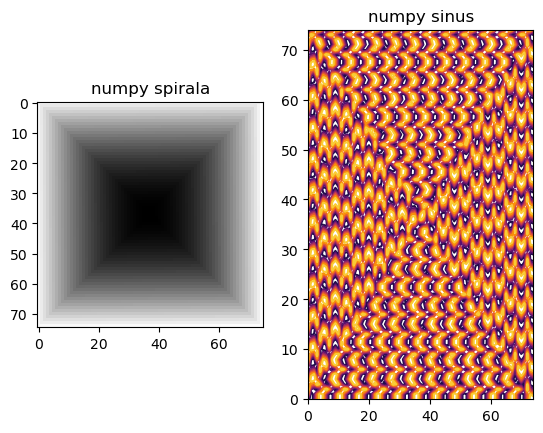

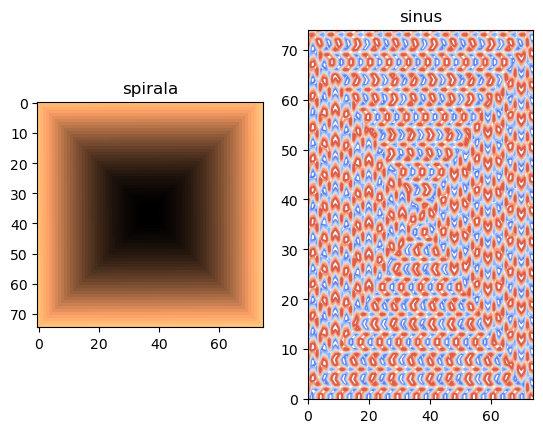

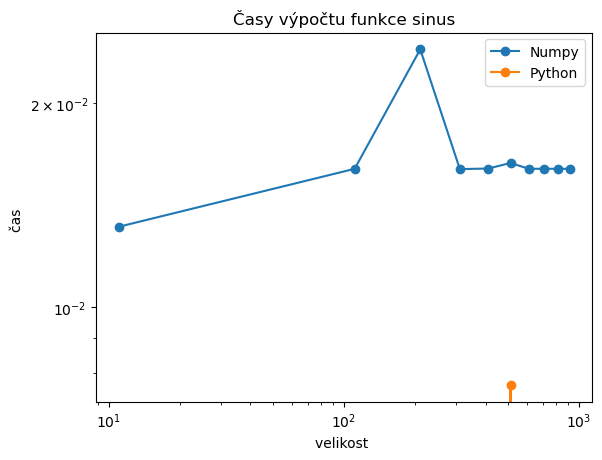

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
n = 75
times_numpy = []
times_python = []

cas = list(range(11,1002,100))
for j in cas:
    start_time = time.time()
    spiral = integer_spiral(n)
    spiral_sin = np.sin(spiral)
    numpy_time = time.time() - start_time
    
    start_time = time.time()
    numpy = integer_spiral_numpy(n)
    numpy_sin = np.sin(numpy)
    spiral_time = time.time() - start_time


    times_numpy.append(numpy_time)
    times_python.append(spiral_time)

plt.subplot(121)
plt.imshow(numpy, cmap='gray', interpolation= 'nearest')
plt.title('numpy spirala')
plt.subplot(122)
plt.contour(numpy_sin, cmap='inferno')
plt.title('numpy sinus')
plt.show()

plt.subplot(121)
plt.imshow(spiral, cmap='copper', interpolation= 'nearest')
plt.title('spirala')
plt.subplot(122)
plt.contour(spiral_sin, cmap='coolwarm')
plt.title('sinus')
plt.show()

plt.loglog(cas, times_numpy, '-o', label='Numpy')
plt.loglog(cas, times_python, '-o', label='Python')
plt.xlabel('velikost ')
plt.ylabel('čas ')
plt.title('Časy výpočtu funkce sinus')
plt.legend()
plt.show()
    


# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.